
2b. Refolded folds
===================





In [4]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer, RotationAnglePlotter
from LoopStructural.datasets import load_laurent2016
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load in the data from the provided examples
data, bb = load_laurent2016()

data.head()

# slight modifications required for the data to make figures consistent
newdata = pd.DataFrame([[5923.504395,4748.135254,3588.621094,'s2',1.0]],columns=['X','Y','Z','feature_name','val'])
data = pd.concat([data,newdata],sort=False)
data.loc[np.logical_and(data['feature_name'] == 's2',np.isnan(data['nx'])),'feature_name'] ='s21'
data.loc[np.logical_and(data['feature_name'] == 's0',~np.isnan(data['val'])),'feature_name'] = 's01'

# data.loc[np.logical_and(data['feature_name'] == 's1',~np.isnan(data['val'])),'feature_name'] = 's11'

rotation = [-69.11979675292969, 15.704944610595703, 6.00014591217041]

In [5]:
images = [] #to store the array containing the images for making figures

1. Create a geological model using the bounding box
2. Associate the data to the model
3. Add the fold frame for F2 to the model 
4. Create an image of the model at a specific view

2021-03-13 23:47:53,565 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
2021-03-13 23:47:53,565 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
2021-03-13 23:47:53,566 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for fold frame coordinate 1, 
Add some more and try again.
2021-03-13 23:47:53,566 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for fold frame coordinate 1, 
Add some more and try again.



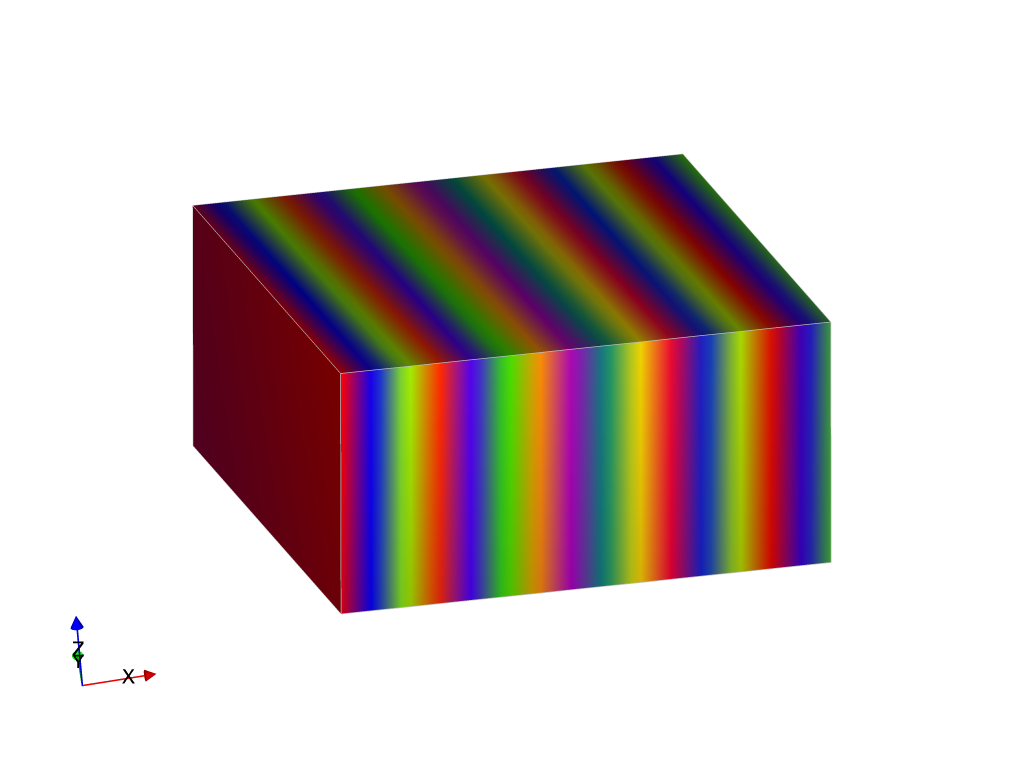

In [6]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=1e5, 
                                     buffer=0.5,
                                    solver='lu',
                                    damp=True)
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s2[0],
                       cmap='prism')
viewer.add_isosurface(s2[0],
                     slices=[0,1])
viewer.add_data(s2[0])
viewer.rotate(rotation)
viewer.display()
images.append(viewer.image_array())

Create an interactive visualisation session for S2 isosurfaces and S2 data

In [7]:
viewer = LavaVuModelViewer(model)
# viewer.add_scalar_field(s2[0],
#                        cmap='prism')
viewer.add_isosurface(s2[0],
                     nslices=10)
viewer.add_data(s2[0])
viewer.rotate(rotation)
viewer.interactive()

Model S1 using S2 as the fold frame (automatically identified if S2 was the last foliation otherwise need to use argument `fold_frame=s2`


In [20]:
s1 = model.create_and_add_folded_fold_frame('s1',
                                            limb_wl=6, 
                                            fold_frame=s2,
                                            av_fold_axis=True,
                                            nelements=5e4,
                                            buffer=0.3,
                                            lag=0.05, #svriogram lag
                                            solver='lu'
                                           )





2021-03-13 23:51:17,431 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
2021-03-13 23:51:17,431 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
2021-03-13 23:51:17,433 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for fold frame coordinate 1, 
Add some more and try again.
2021-03-13 23:51:17,433 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for fold frame coordinate 1, 
Add some more and try again.



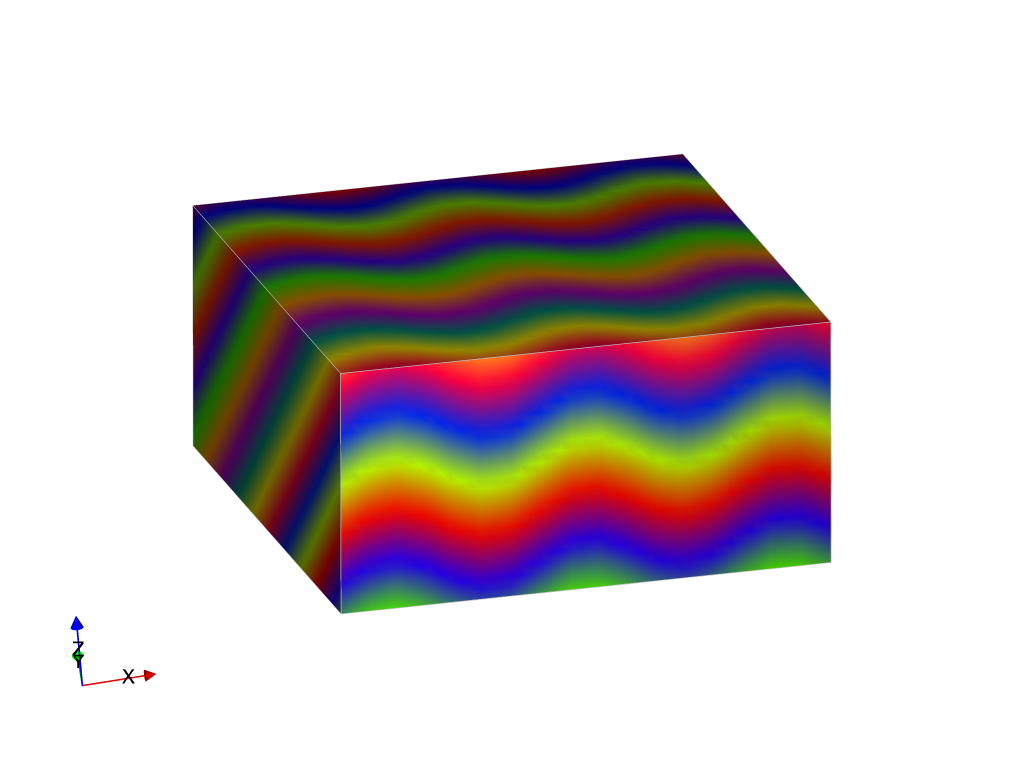

In [21]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s1[0],
                       cmap='prism')
viewer.add_isosurface(s1[0],nslices=5)
# viewer.add_fold(s1.fold)
viewer.add_data(s1[0])
# viewer.add_points(s1[0].interpolator.support.nodes,'nodes')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()
images.append(viewer.image_array())

Visualise the fold rotation for F1 fold, this shows the calculated values and the fitted curve. If this curve doesn't fit then the parameters used in the previous step may need changing. 
* If the wavelength of the fold isn't estimated correctly, you can manually specify it
* The lag of the s-variogram can be changed
* The fold axis may not be modelled correctly




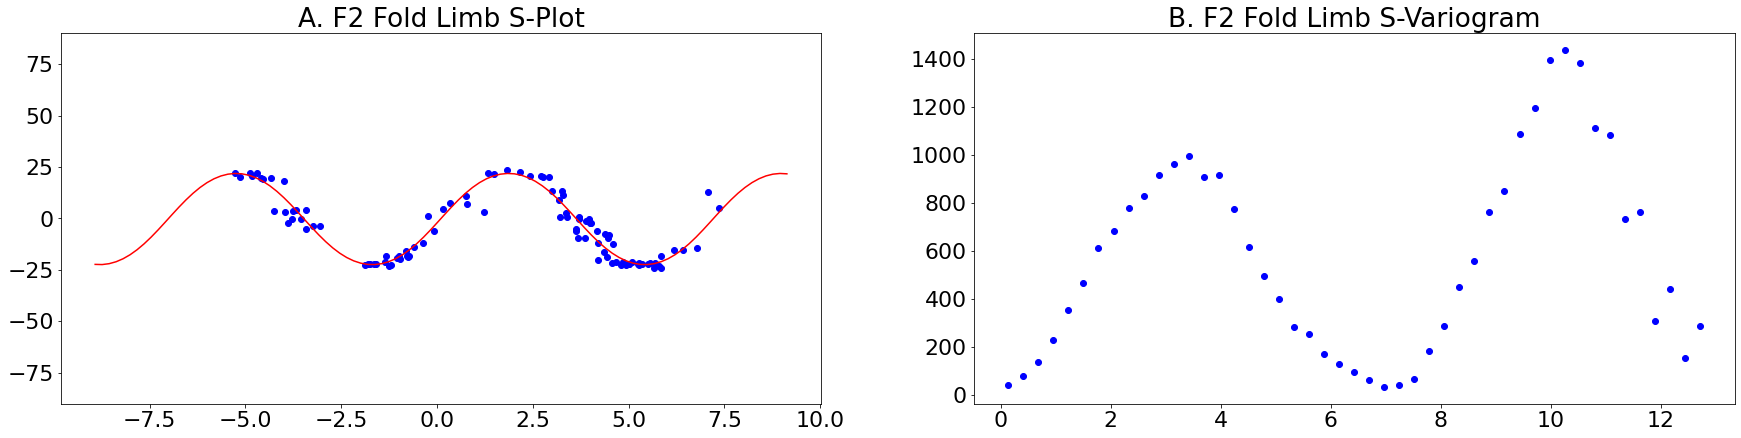

In [25]:
plt.rcParams.update({'font.size': 22})

s1.fold.foldframe[0].set_model(model)
# s1.fold.foldframe[1].set_model(model)

s2_s1_splot = RotationAnglePlotter(s1)
s2_s1_splot.add_fold_limb_data()
s2_s1_splot.add_fold_limb_curve() 
s2_s1_splot.add_limb_svariogram()#fold_limb_
s2_s1_splot.ax[1,0].set_title('A. F2 Fold Limb S-Plot')
s2_s1_splot.ax[1,1].set_title('B. F2 Fold Limb S-Variogram')

s2_s1_splot.fig.delaxes(s2_s1_splot.ax[0][0])
s2_s1_splot.fig.delaxes(s2_s1_splot.ax[0][1])

# fig, ax = plt.subplots(1,2,figsize=(10,5))
# x = np.linspace(s2[0].min(),s2[0].max(),1000)
# ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
# ax[0].plot(s1['fold'].fold_limb_rotation.fold_frame_coordinate,s1['fold'].fold_limb_rotation.rotation_angle,'bo')
# ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

S0 is added using the modelled s1 as the fold frame.


In [26]:
s0 = model.create_and_add_folded_foliation('s0',
                                           fold_frame=s1,
                                            av_fold_axis=True,
                                            nelements=5e4,
                                            buffer=0.2,
#                                             damp=True,
                                           solver='lu'
                                           )




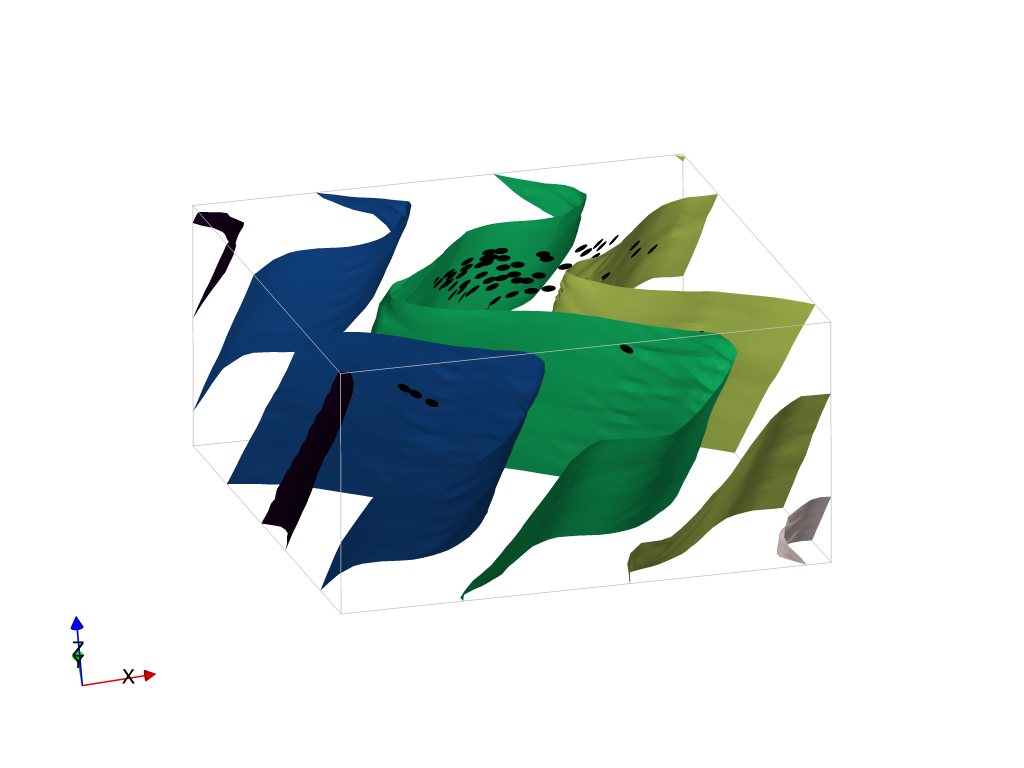

In [27]:
viewer = LavaVuModelViewer(model)
# viewer.add_scalar_field(s0,
#                        cmap='tab20')
viewer.add_isosurface(s0,nslices=5,paint_with=s0)
viewer.add_data(s0,cmap='tab20')
# viewer.add_vector_field(s1[0],locations=model.regular_grid()[::10,:])#s0.interpolator.get_gradient_constraints()[:,:3])
# # viewer.add_vector_field(s0.fold,locations=s0.interpolator.get_gradient_constraints()[:,:3])

# viewer.add_fold(s0.fold,locations=s0.interpolator.get_gradient_constraints()[:,:3])
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
# viewer.interactive()
viewer.display()
images.append(viewer.image_array())

Text(0.5, 1.0, 'C. S0 geological model')

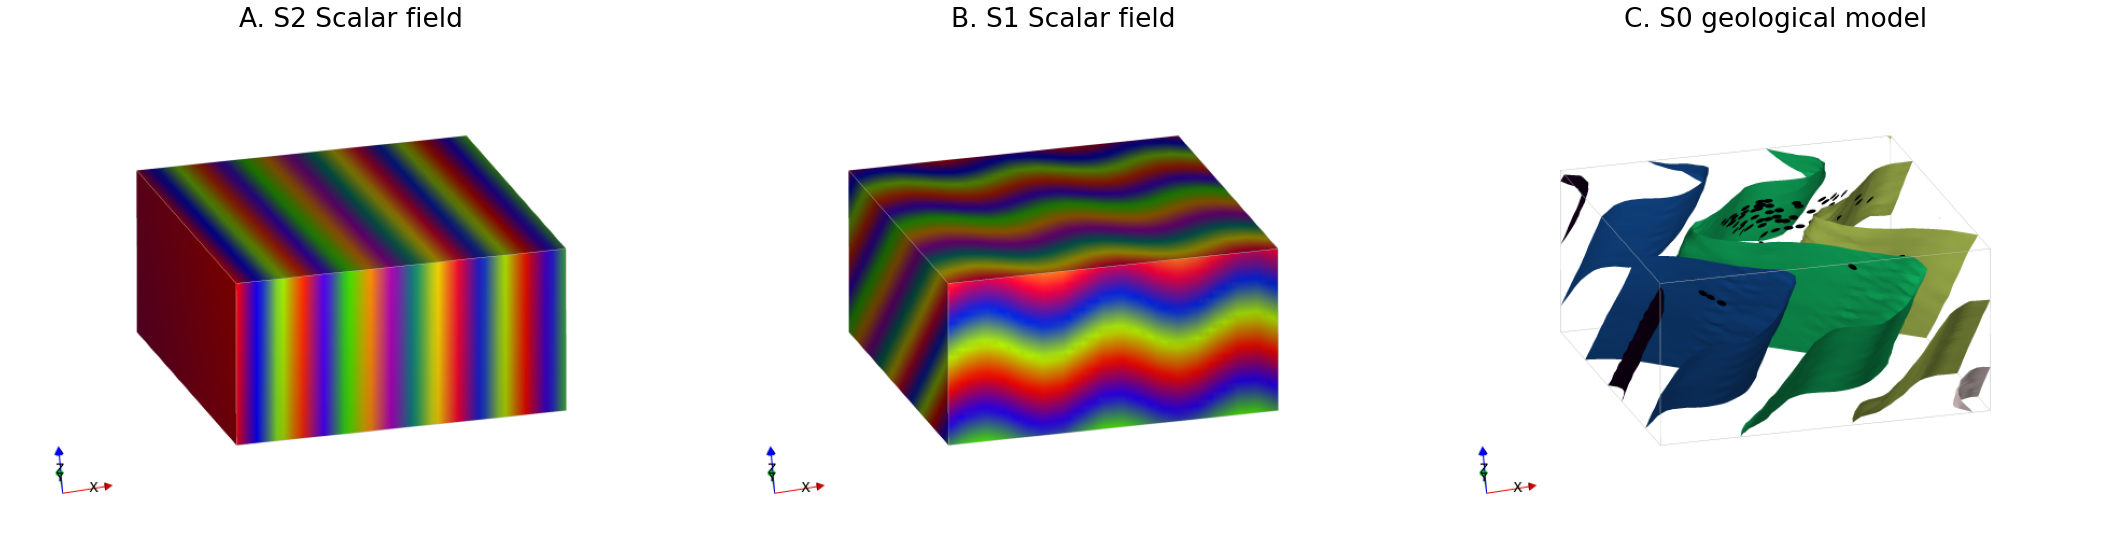

In [15]:
fig, ax = plt.subplots(1,3,figsize=(30,10))
plt.rcParams.update({'font.size': 22})

ax[0].imshow(images[0])
ax[1].imshow(images[1])
ax[2].imshow(images[-1])
for i in range(3):
    ax[i].axis('off')
plt.tight_layout()
ax[0].set_title('A. S2 Scalar field')
ax[1].set_title('B. S1 Scalar field')
ax[2].set_title('C. S0 geological model')

S1/S0 S-Plots 
~~~~~~~~~~~~~




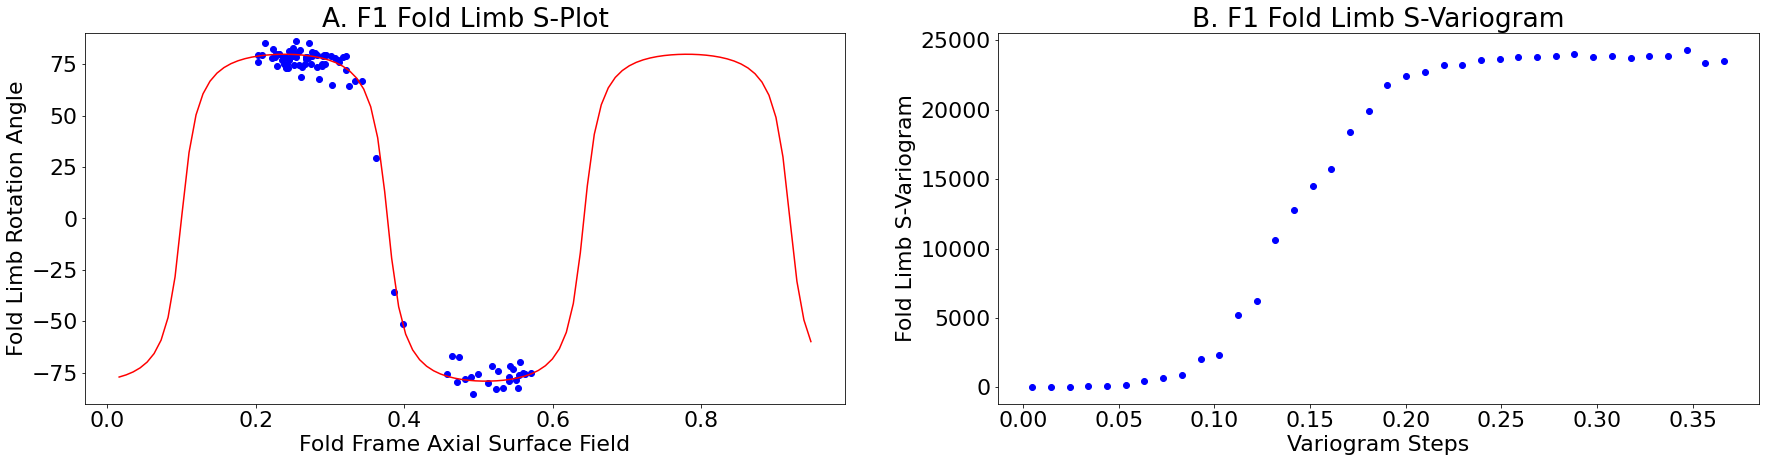

In [34]:
s0.fold.foldframe[0].set_model(model)
s1_s0_splot = RotationAnglePlotter(s0)
s1_s0_splot.add_fold_limb_data()
s1_s0_splot.add_fold_limb_curve()
s1_s0_splot.add_limb_svariogram()
s1_s0_splot.default_titles()
s1_s0_splot.ax[1,0].set_title('A. F1 Fold Limb S-Plot')
s1_s0_splot.ax[1,1].set_title('B. F1 Fold Limb S-Variogram')

s1_s0_splot.fig.delaxes(s1_s0_splot.ax[0][0])
s1_s0_splot.fig.delaxes(s1_s0_splot.ax[0][1])

In [23]:


# fig, ax = plt.subplots(1,2,figsize=(10,5))
# x = np.linspace(s1[0].min(),s1[0].max(),1000)
# ax[0].plot(x,s0['fold'].fold_limb_rotation(x))
# ax[0].plot(s0['fold'].fold_limb_rotation.fold_frame_coordinate,s0['fold'].fold_limb_rotation.rotation_angle,'bo')
# ax[1].plot(s0['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

viewer = LavaVuModelViewer(model)
viewer.add_isosurface(s0,nslices=10,paint_with=s0,cmap='tab20')
viewer.add_isosurface(s1[0],slices=[0.38,.64,.1],paint_with=s1[0],cmap='rainbow')
viewer.add_isosurface(s2[0],slices=[-7.5,-3.5,1.5,5.5],paint_with=s2[0],cmap='rainbow')

viewer.add_data(s0)
# viewer.add_fold(s0['fold'],locations=s0['support'].barycentre()[::80])
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.interactive()

In [24]:
viewer.export_to_webgl('fold_model.html')